<a href="https://colab.research.google.com/github/ujjwalsharma07-og/Python/blob/main/Yulu_Hypothesis_Testing__case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
# Importing required libraries -
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind # T-test for independent samples
from scipy.stats import shapiro # Shapiro-Wilk’s test for Normality
from scipy.stats import levene # Levene's test for Equality of Variance
from scipy.stats import f_oneway # One-way ANOVA
from scipy.stats import chi2_contingency # Chi-square test of independence

In [160]:
import warnings
warnings.filterwarnings('ignore')


In [161]:
df = pd.read_csv('bike_sharing.csv')

In [162]:
df.shape

(10886, 12)

In [163]:
df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6977,2012-04-09 01:00:00,2,0,1,1,18.86,22.725,41,8.9981,4,12,16
1179,2011-03-13 20:00:00,1,0,0,1,13.12,15.150,57,19.9995,23,54,77
9088,2012-09-02 01:00:00,3,0,0,1,27.06,29.545,89,0.0000,15,58,73
3723,2011-09-06 02:00:00,3,0,1,3,22.14,25.760,94,16.9979,0,2,2
2489,2011-06-11 15:00:00,2,0,0,1,33.62,38.635,49,7.0015,142,232,374
1862,2011-05-04 12:00:00,2,0,1,2,18.04,21.970,62,23.9994,19,105,124
7860,2012-06-07 21:00:00,2,0,1,1,25.42,31.060,41,22.0028,30,283,313
6140,2012-02-12 02:00:00,1,0,0,2,4.10,3.030,58,39.0007,1,26,27
1205,2011-03-14 23:00:00,1,0,1,1,13.12,17.425,53,0.0000,2,17,19
1798,2011-05-01 20:00:00,2,0,0,2,18.86,22.725,82,0.0000,35,86,121


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [165]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [166]:
df. describe(include="object")

,datetime
count,10886
unique,10886
top,2012-12-19 23:00:00
freq,1


In [167]:
df.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [168]:
df.workingday.value_counts()

,count
workingday,
1,7412
0,3474


In [169]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
10881,False
10882,False
10883,False
10884,False


In [170]:
df[df.duplicated()]


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


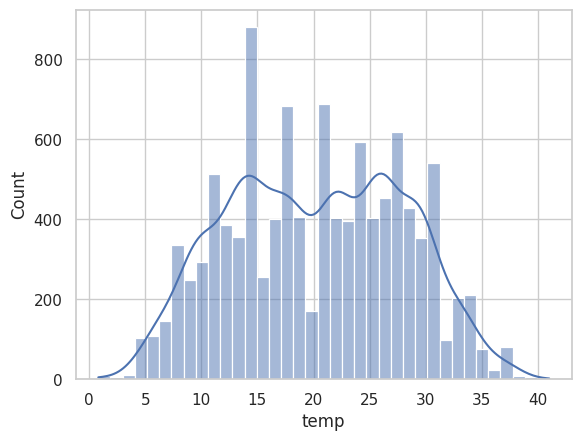

In [171]:
sns.histplot(data=df, x='temp', kde=True)
plt.show()

<Axes: xlabel='season', ylabel='count'>

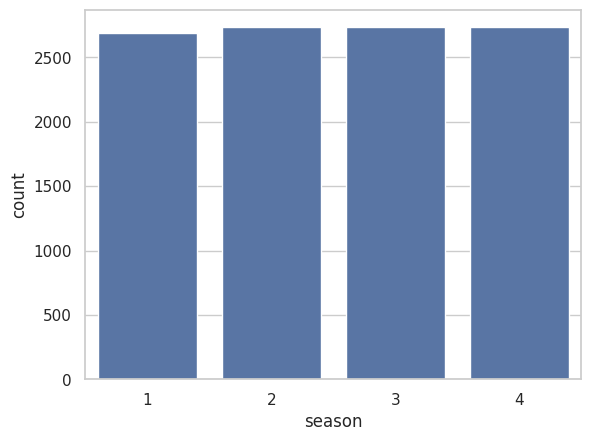

In [172]:
sns.countplot(data=df, x='season')


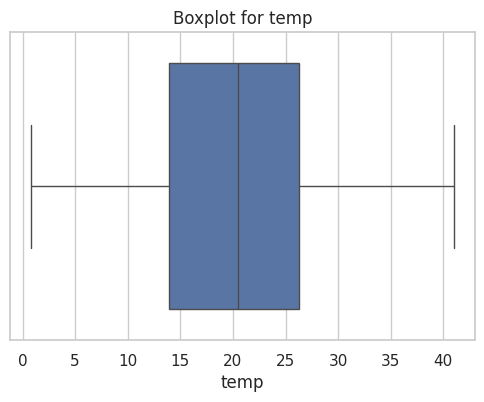

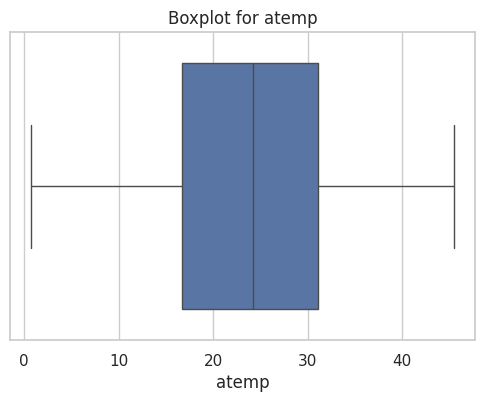

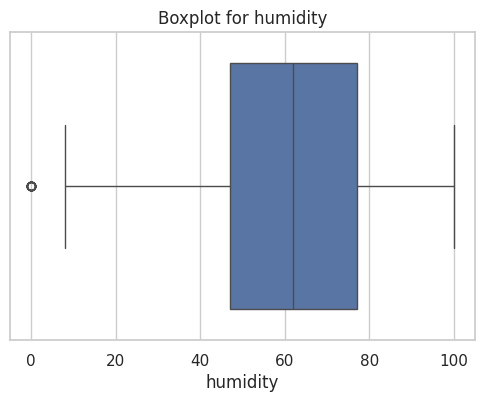

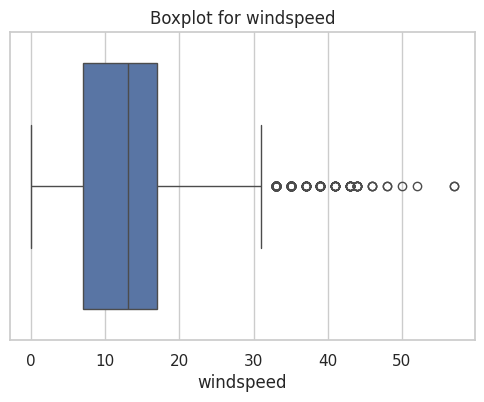

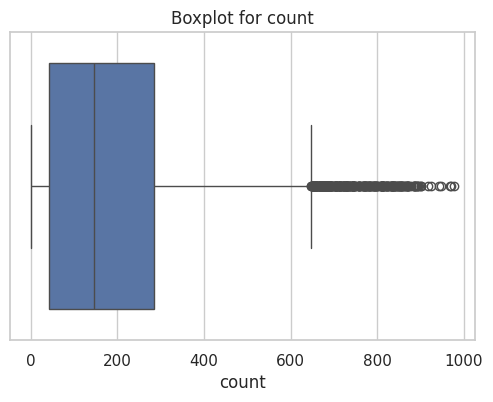

In [173]:
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'count']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot for {col}')
    plt.show()

In [174]:
def find_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

In [175]:
# Call the find_outliers_iqr function to get the lower and upper bounds
outliers_windspeed, lower_windspeed, upper_windspeed = find_outliers_iqr(df, 'windspeed')

# Use the numerical lower and upper bounds to filter the DataFrame
df_clean = df[(df['windspeed'] >= lower_windspeed) & (df['windspeed'] <= upper_windspeed)].copy()

In [176]:
df['windspeed'] = df['windspeed'].clip(lower=lower_windspeed, upper=upper_windspeed)



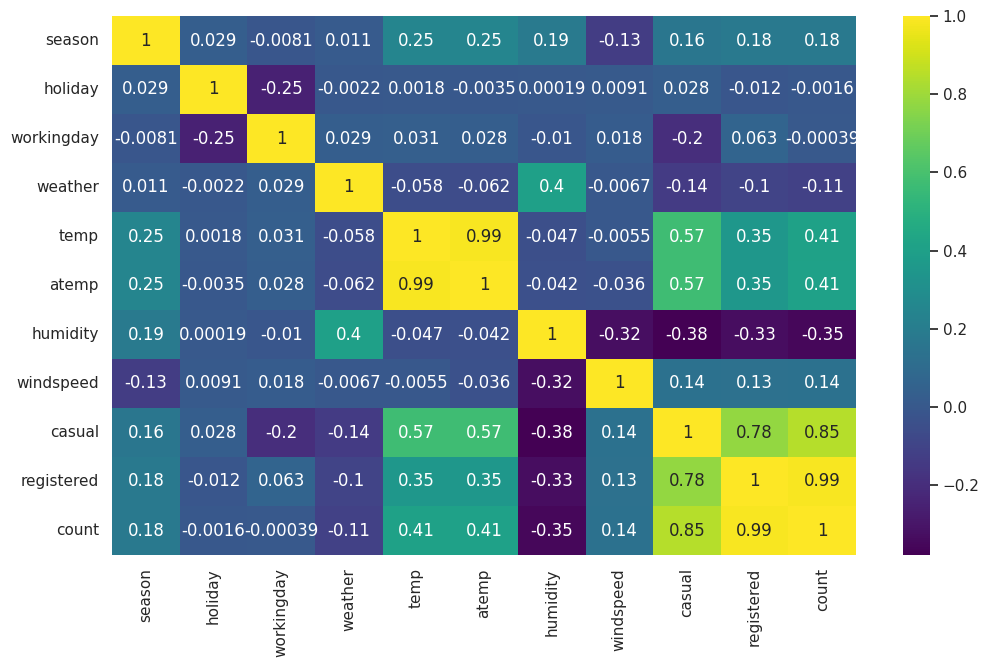

In [177]:
numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12,7))
sns.heatmap(numerical_df.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

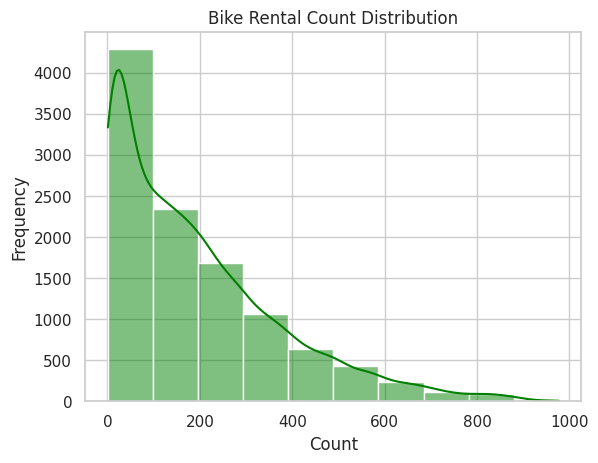

In [178]:
sns.histplot(data=df, x='count', bins=10, kde=True, color='green')
plt.title("Bike Rental Count Distribution")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

Basically we have some options to deal with outlers before hypotesting.


Very firsly we can use IQR method to remove outliers IQR (Interquartile Range) is a statistical measure of dispersion  
it describes the middle 50% of the data.



Moreover, the another way is log transformation Log transformation is a mathematical technique where we apply the logarithm function to a variable to:

-Reduce right skewness
-Stabilize variance
-Make data more "normal" (bell-shaped)

In [179]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Assuming df is your DataFrame
df_clean = remove_outliers_iqr(df, 'count')

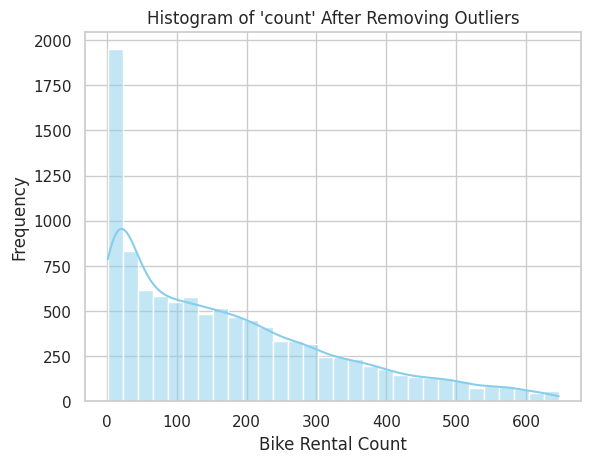

In [180]:
sns.histplot(data=df_clean, x='count', bins=30, kde=True, color='skyblue')
plt.title("Histogram of 'count' After Removing Outliers")
plt.xlabel("Bike Rental Count")
plt.ylabel("Frequency")
plt.show()

This histogram will now show a more accurate distribution of daily bike rentals, without distortion from extreme high values.

You’ll likely see the data becomes more centered, and right skew is reduced.

This cleaned distribution is now better suited for:

T-tests
Correlation analysis
Predictive modeling

In [181]:
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [182]:
df.groupby('holiday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,10575.0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,311.0,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [183]:
df.groupby('season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [184]:
df.groupby('weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


Ho : the demands of bikes on weekdays are greater nd smaller on weekends.


Ha : the demands of bikes on weekdays are less than the demand on weekends.


Ans.

A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution.

In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test.

In the past, for convenience, we use z table when n > 30. We don't have to do it anymore.

In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

In [185]:
import numpy as np
from scipy import stats #Hypothesis Testing

# Remove or modify the following line that imports the module as ttest_ind
# import scipy.stats as ttest_ind #T-test for independent samples

# ... (previous code)

# Assuming df_clean has been created by removing outliers from 'count'
# Apply log transformation to the 'count' column in df_clean
df_clean['log_count'] = np.log1p(df_clean['count']) # Using log1p to handle potential zero values

working = df_clean[df_clean['workingday'] == 1]['log_count']
non_working = df_clean[df_clean['workingday'] == 0]['log_count']

# Perform independent t-test using stats.ttest_ind
t_stat, p_value = stats.ttest_ind(working, non_working, equal_var=False)  # Welch’s t-test

# Print result
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Significant difference: reject null hypothesis")
else:
    print("❌ No significant difference: fail to reject null hypothesis")

T-Statistic: -3.2475483828578957
P-Value: 0.0011693127157109012
✅ Significant difference: reject null hypothesis


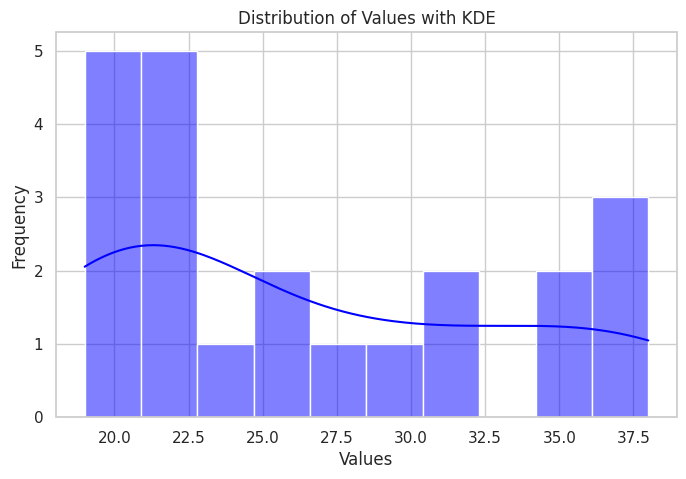

Skewness: 0.5665134801986446


In [186]:
data = [38, 36, 31, 30, 20, 28, 25, 26, 19, 21, 19, 21, 20, 21, 21, 20, 21, 24, 32, 35, 38, 38]

df = pd.DataFrame({'values': data})

plt.figure(figsize=(8, 5))
sns.histplot(df['values'], kde=True, bins=10, color='blue')
plt.title('Distribution of Values with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Step 5: Print Skewness Value
print("Skewness:", df['values'].skew())

Key items learnt from the case study.

Anova test assumption fails in the case study. As neither variance are equal and disb of variables are normal.
Variance equality test was done using Levene’s test.
Normal distribution check was done by using shapiro welch test.
Practical data never follows normal disb hence mention of non parametric test like Krushkal Welch test.
Removal of outlier data using IQR principles, visualized using boxplots.
Careful wording of saying that we fail to reject the Ho instead of we accept Ho when p value is greater than alpha.


**Recommendations:**



As casual users are very less Yulu should focus on marketing startegy to bring more customers. for eg. first time user discount, friends and family
discounts, referral bonuses etc.



On non working days as count is very low Yulu can think on the promotional activities like city exploration competition, some health campaigns etc.



In heavy rains as rent count is very low Yulu can introduce a different vehicle such as car or having shade or protection from that rain.



Based on above if you can provide me good recommendation and how business case should be presented, it will help



Central Limit Theorem -
You all must have studies about the CLT in previous classes.

According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.

In other words, if we find the mean of a large number of independent random variables, the mean will follow a normal distribution, irrespective of the distribution of the original variables.

In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.

Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.

Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.